In [2]:
import os
import sys
import time

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.datasets

import sklearn

In [3]:
# Useing pipelines
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Tools
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [5]:
X_final_train_images, X_final_test_images, y_final_train, y_final_test = train_test_split(train_images, train_labels, test_size=0.3, random_state=42)

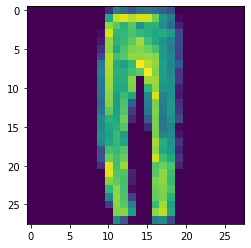

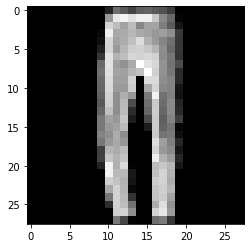

1


In [6]:
# origin
plt.imshow(X_final_train_images[0])
plt.show()

# grayscale 
plt.imshow(X_final_train_images[0], cmap='gray')
plt.show()

print(y_final_train[0])

def print_sample(img):
    plt.imshow(img, cmap='gray')
    plt.show()

In [6]:
X_train_images, X_test_images, y_train, y_test = train_test_split(X_final_train_images, y_final_train, test_size=0.3, random_state=11)

In [7]:
X_train = X_train_images.reshape(X_train_images.shape[0], 784)
X_test = X_test_images.reshape(X_test_images.shape[0], 784)

In [8]:
# Try first random forast
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)
# 87.43%

0.8743650793650793

In [10]:
#X_train_images, X_test_images, y_train, y_test = train_test_split(X_final_train_images, y_final_train, test_size=0.95, random_state=11)
#X_train_images, X_test_images, y_train, y_test = train_test_split(X_train_images, y_train, test_size=0.3, random_state=11)
X_train_images, X_test_images, y_train, y_test = train_test_split(X_final_train_images, y_final_train, test_size=0.03, random_state=11)

print(len(X_train_images), ":", len(X_test_images))

40740 : 1260


In [11]:
X_train = X_train_images.reshape(X_train_images.shape[0], 784)
X_test = X_test_images.reshape(X_test_images.shape[0], 784)

In [30]:
# Try first random forast
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train, y_train)

rfc.score(X_test, y_test)
# 85.10% in 10 sec

0.8510582010582011

In [77]:
SEPERATES_COUNT = 5

seperates = np.linspace(0, 255, SEPERATES_COUNT).tolist()

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

def add_seperates_sum(arr: np.array):
    for i in range(1, SEPERATES_COUNT):
        arr['sep_' + str(i)] = ((seperates[i-1] <= arr) & (arr <= seperates[i])).sum()
    
    return arr

X_train_df = X_train_df.apply(add_seperates_sum, axis=1)
X_test_df = X_test_df.apply(add_seperates_sum, axis=1)

In [78]:
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# Not work

c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8507936507936508

In [97]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

def add_seperates_sum(arr: np.array):
    arr['zero'] = (arr == 0).sum()

    return arr

X_train_df = X_train_df.apply(add_seperates_sum, axis=1)
X_test_df = X_test_df.apply(add_seperates_sum, axis=1)

In [96]:
rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# 85.47%

c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\users\omer2\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8547619047619047

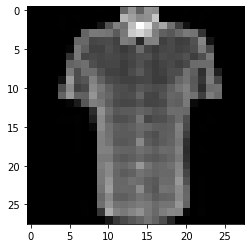

365
419


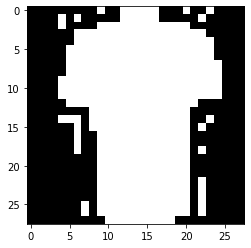

In [7]:
img = X_train_images[0]

print_sample(img)

print((img == 0).sum())
print((img != 0).sum())

img = ((img == 0) == False)
print_sample(img)

# 0   - is Black, background
# 255 - is White

In [22]:
# make it background and exists
# background - 0
# exists - 1

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

def add_seperates_sum(arr: np.array):    
    arr = (arr != 0)
    return arr

X_train_df = X_train_df.apply(add_seperates_sum, axis=1)
X_test_df = X_test_df.apply(add_seperates_sum, axis=1)

rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# 85.87%

0.8301587301587302

In [201]:
# Try to remove the edges
def images_to_vectors(images):
    return images.reshape(images.shape[0], images.shape[1] * images.shape[2])

X_train_images2 = X_train_images.copy()
X_test_images2 = X_test_images.copy()

X_train_images2 = X_train_images2 != 0
X_test_images2 = X_test_images2 != 0

PANDING = 4

new_arr = list()
i = 0
for img in X_train_images2:
    img = img[PANDING:29-PANDING, PANDING:29-PANDING]
    new_arr.append(img.tolist())
    i += 1
    
X_train_images2 = np.array(new_arr)

new_arr = list()
i = 0
for img in X_test_images2:
    img = img[PANDING:29-PANDING, PANDING:29-PANDING]
    new_arr.append(img.tolist())
    i += 1

X_test_images2 = np.array(new_arr)
        
X_train_df = pd.DataFrame(images_to_vectors(X_train_images2))
X_test_df = pd.DataFrame(images_to_vectors(X_test_images2))

rfc = RandomForestClassifier(random_state=11)

rfc.fit(X_train_df, y_train)

rfc.score(X_test_df, y_test)
# 80.97%
# But is not good!

0.8097883597883598

In [8]:
# Useing pipelines
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [25]:
steps = [
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

#model.fit(X_train_images, y_train)

#model.sorce(X_test_images, y_test)

model.fit(X_train_df, y_train)

model.score(X_test_df, y_test)

0.8301587301587302

In [27]:
class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, x, y = None):
        return x

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

#model.fit(X_train_images, y_train)

#model.sorce(X_test_images, y_test)

model.fit(X_train_df, y_train)

model.score(X_test_df, y_test)

0.8301587301587302

In [29]:
class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_vector = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
        
        X_df = pd.DataFrame(X_vector)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

0.8174603174603174

In [31]:
# Make it boolean of it background or it not
# 0 - it background
# 1 - it exists (it background)

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images != 0
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

0.8301587301587302

In [36]:
# Add sum of

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images != 0
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
        
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
                    
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

0.834920634920635

In [39]:
# Make the model stable

from sklearn.model_selection import RandomizedSearchCV

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images != 0
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                    
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
}

model = RandomizedSearchCV(
    model, param_grid, 
    n_iter = 10,
    cv = 3
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

D:\Projects\Python\data-science-walmart-and-more\venv\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.8301587301587302

In [42]:
# Make the model stable

from sklearn.model_selection import RandomizedSearchCV

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images != 0
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
}

model = RandomizedSearchCV(
    model, param_grid, 
    n_iter = 10,
    cv = 3
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

D:\Projects\Python\data-science-walmart-and-more\venv\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.834920634920635

In [43]:
# Add flag of when it background
BACKGROUND_LIMT = 3

from sklearn.model_selection import RandomizedSearchCV

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images = X_images > BACKGROUND_LIMT
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('PreProcessing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
}

model = RandomizedSearchCV(
    model, param_grid, 
    n_iter = 10,
    cv = 3
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

D:\Projects\Python\data-science-walmart-and-more\venv\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.8444444444444444

In [68]:
# upgrade background_limit to param
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
                
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [0,1,2,3,4,5,6,7,9,10]
}

model = GridSearchCV(
    model, param_grid,
    cv = 3
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

0.8333333333333334

In [69]:
model.best_params_

{'pre_processing__background_limit': 9}

In [9]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [9]:
# trying to find the best background_limit

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
                
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
        
        return X_df

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [0, 3, 9]
}

model = GridSearchCV(
    model, param_grid,
    cv = 5
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

# 0 - gives 83.49% - defualt
# 3 - gives 84.44% - best score
# 9 - gives 83.33% - best param ?

KeyboardInterrupt: 

In [16]:
# Visual Colors Count

X_images = X_train_images
y = y_train

X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])

new_data = list()

i = 0
for x_vector in X_vectors:
    vector = list()
    for color in range(0, 256, 1):
             vector = np.append(vector, [(x_vector == color).sum()])
            
    new_data.append(vector)
    i += 1
            
X_df = pd.DataFrame(new_data)
X_df['Label'] = y

X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,Label
0,365.0,24.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6
1,491.0,19.0,10.0,12.0,7.0,5.0,2.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5
2,479.0,0.0,1.0,3.0,4.0,7.0,3.0,2.0,0.0,0.0,...,1.0,2.0,3.0,1.0,2.0,4.0,7.0,7.0,15.0,1
3,476.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,2.0,2.0,1.0,2.0,1.0,4.0,2.0,3.0,54.0,1
4,477.0,7.0,5.0,3.0,0.0,0.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7


In [17]:
X_df.mean()[X_df.mean() >= 3]

0        394.277925
1          8.006429
2          4.807075
3          3.200816
255        6.344048
Label      4.503027
dtype: float64

So most of the pixels arr 0 (black)

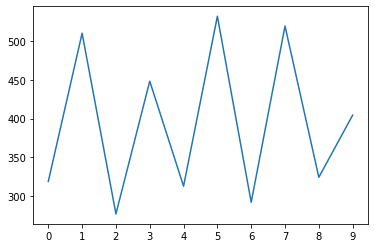

In [18]:
plt.plot(X_df.groupby('Label')[0].mean())
plt.xticks(np.sort(X_df['Label'].unique()))
plt.show()

Need to add Text to the labels

<Figure size 432x288 with 0 Axes>

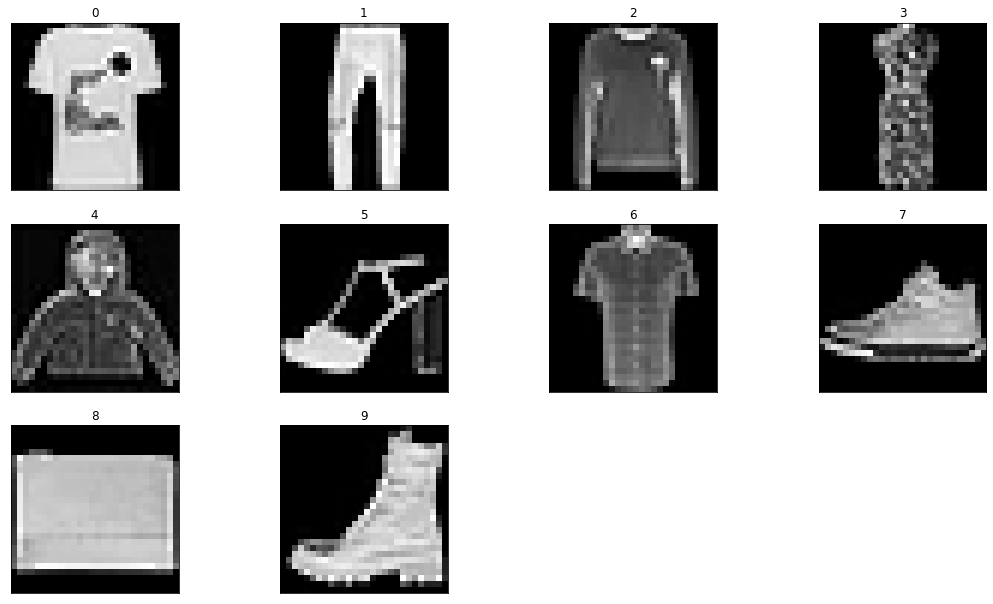

In [19]:
labels = np.sort(X_df['Label'].unique()).tolist()
images_to_show = np.full(len(labels), None)
while len(labels) > 0:
    label = labels.pop()
    images_to_show[label] = [label, X_images[y == label][0]]

# Show Images
plt.figure()

fig = plt.figure()

fig.set_size_inches(18.5, 10.5)

i = 0
for item in images_to_show:
    (label, img) = item
    
    ax = fig.add_subplot((int)(len(images_to_show) / 4)+1, 4, i+1)
        
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax.set_title(label)
    ax.imshow(img, cmap='gray')
    
    i += 1

plt.style.use('classic')

plt.show()

Continue with the improving

In [172]:
class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images_zero = X_images == 0
        
        feature_list = []
        for image in X_images_zero:
            rows = np.sum(image, axis=0)
            collumns = np.sum(image, axis=1)
            feature_list.append(np.block([rows,collumns]))
        
        feature_list_df = pd.DataFrame(np.array(feature_list))
        
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
                        
        return pd.concat([feature_list_df, X_df], axis=1)

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [3]
}

model = GridSearchCV(
    model, param_grid,
    cv = 5
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)
# 85.07% by lior

0.8507936507936508

In [20]:
class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images_zero = X_images == 0
        
        feature_list = []
        for image in X_images_zero:
            rows = np.sum(image, axis=0)
            collumns = np.sum(image, axis=1)
            feature_list.append(np.block([rows,collumns]))
        
        feature_list_df = pd.DataFrame(np.array(feature_list))
        
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
                        
        return pd.concat([feature_list_df, X_df], axis=1)

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [0]
}

model = GridSearchCV(
    model, param_grid
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

# Score 0.863

0.8634920634920635

In [25]:
class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images_zero = X_images == 0
        
        feature_list = []
        for image in X_images_zero:
            rows = np.sum(image, axis=0)
            collumns = np.sum(image, axis=1)
            feature_list.append(np.block([rows,collumns]))
        
        feature_list_df = pd.DataFrame(np.array(feature_list))
        
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
                        
        return pd.concat([feature_list_df, X_df], axis=1)

pre_processing = PreProcessingTranformer(background_limit=0)

X_train_pre = pre_processing.transform(X_train_images, y_train)
X_test_pre = pre_processing.transform(X_test_images, y_test)

scores_res = []
for n in range(100, 1200+1, 50):
    model = RandomForestClassifier(random_state=11, n_estimators=n)
    
    model.fit(X_train_pre, y_train)

    model.score(X_test_pre, y_test)
    
    score_res = model.score(X_test_pre, y_test)
        
    scores_res.append((n, score_res))
    print((n, score_res))
    
data = pd.DataFrame(scores_res).sort_values(by=0)
data

(100, 0.8634920634920635)
(150, 0.8658730158730159)
(200, 0.8738095238095238)
(250, 0.873015873015873)
(300, 0.873015873015873)
(350, 0.8738095238095238)
(400, 0.8738095238095238)
(450, 0.8722222222222222)
(500, 0.8746031746031746)
(550, 0.8714285714285714)
(600, 0.8753968253968254)
(650, 0.8746031746031746)
(700, 0.8753968253968254)
(750, 0.8738095238095238)
(800, 0.8761904761904762)
(850, 0.8753968253968254)
(900, 0.8738095238095238)
(950, 0.873015873015873)
(1000, 0.8722222222222222)
(1050, 0.873015873015873)
(1100, 0.8738095238095238)
(1150, 0.8738095238095238)
(1200, 0.8722222222222222)


,0,1
0,100,0.863492
1,150,0.865873
2,200,0.873810
3,250,0.873016
4,300,0.873016
5,350,0.873810
6,400,0.873810
7,450,0.872222
8,500,0.874603
9,550,0.871429


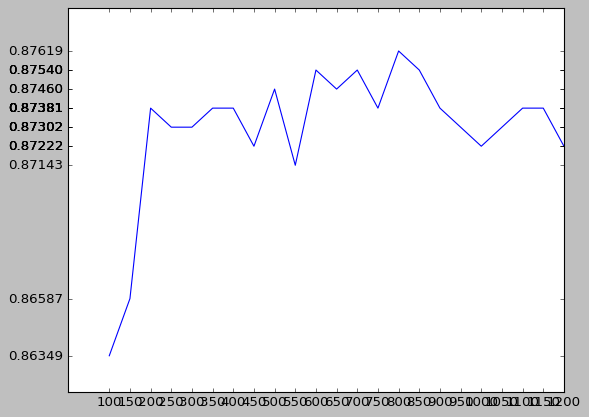

In [27]:
x,y = data[0], data[1]
plt.plot(x, y)
plt.xticks(x)
plt.yticks(y)

None

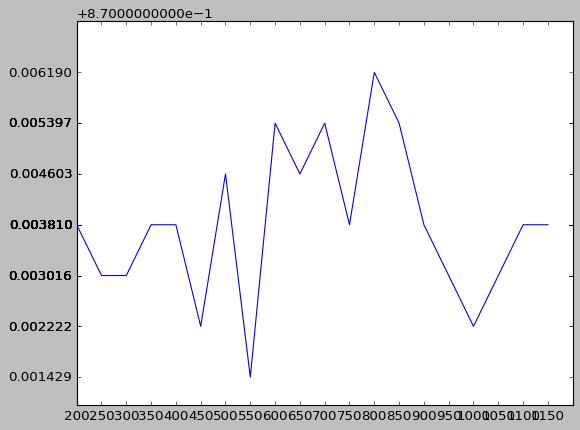

In [42]:
data_show = data[2:-1]
x,y = data_show[0], data_show[1]
plt.plot(x, y)
plt.xticks(x)
plt.yticks(y)

None

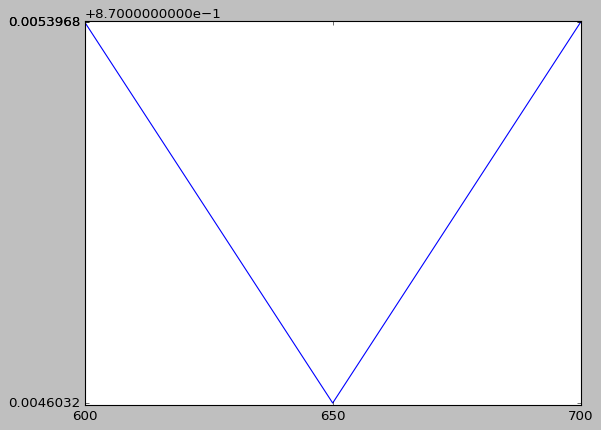

In [47]:
data_show = data[10:-10]
x,y = data_show[0], data_show[1]
plt.plot(x, y)
plt.xticks(x)
plt.yticks(y)

None

In [22]:
# Complit

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images_zero = X_images == 0
        
        feature_list = []
        for image in X_images_zero:
            rows = np.sum(image, axis=0)
            collumns = np.sum(image, axis=1)
            feature_list.append(np.block([rows,collumns]))
        
        feature_list_df = pd.DataFrame(np.array(feature_list))
        
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
                        
        return pd.concat([feature_list_df, X_df], axis=1)

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11, n_estimators=600))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [0]
}

model = GridSearchCV(
    model, param_grid
)

model.fit(X_train_images, y_train)

model.score(X_test_images, y_test)

# Score 0.875

0.8756349206349207

In [27]:
# Try XGBClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import VotingClassifier

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images_zero = X_images == 0
        
        feature_list = []
        for image in X_images_zero:
            rows = np.sum(image, axis=0)
            collumns = np.sum(image, axis=1)
            feature_list.append(np.block([rows,collumns]))
        
        feature_list_df = pd.DataFrame(np.array(feature_list))
        
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
        
        X_df.columns = pd.DataFrame(X_df.columns)[0].apply(lambda name: 'img_' + str(name)).tolist()
        feature_list_df.columns = pd.DataFrame(feature_list_df.columns)[0].apply(lambda name: 'feature_' + str(name)).tolist()
        
        # finall
        X_df = pd.concat([feature_list_df, X_df], axis=1)
        X_df.columns = list(range(len(X_df.columns)))
        
        return X_df


In [28]:
pre_processing = PreProcessingTranformer(background_limit=0)

X_train_images_pre = pre_processing.fit_transform(X_train_images, y_train)

X_test_images_pre = pre_processing.fit_transform(X_test_images, y_test)

In [29]:
X_images_pre = pd.concat([X_train_images_pre, X_test_images_pre])
y_pre = np.array(y_train.tolist() + y_test.tolist())

In [ ]:
model = RandomForestClassifier(random_state=11, n_estimators=600)

cross_val_score(model, X_images_pre, y_pre)

In [ ]:
model = RandomForestClassifier(random_state=11, n_estimators=100)

cross_val_score(model, X_images_pre, y_pre)

In [ ]:
xgbc = XGBClassifier(random_state=11, n_estimators=100)

cross_val_score(xgbc, X_images_pre, y_pre)

In [ ]:
xgbc = XGBClassifier(random_state=11, n_estimators=600)

cross_val_score(xgbc, X_images_pre, y_pre)

In [7]:
# Complit

class PreProcessingTranformer(BaseEstimator, TransformerMixin):
    def __init__(self, background_limit=0, **kwargs):
        self.background_limit = background_limit
        
        self._param_names = ['background_limit'] + list(kwargs.keys())
        for key, value in kwargs.items():
            setattr(self, key, value)
        
    def get_params(self, deep=True):
        return { param: getattr(self, param) for param in self._param_names}
        
    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
                
    def fit(self, x, y = None):
        return self
    
    def transform(self, X_images, y = None):
        
        X_images_zero = X_images == 0
        
        feature_list = []
        for image in X_images_zero:
            rows = np.sum(image, axis=0)
            collumns = np.sum(image, axis=1)
            feature_list.append(np.block([rows,collumns]))
        
        feature_list_df = pd.DataFrame(np.array(feature_list))
        
        X_images = X_images > self.background_limit
        
        X_vectors = X_images.reshape(X_images.shape[0], X_images.shape[1] * X_images.shape[2])
                  
        X_vectors = X_vectors.tolist()
        i = 0
        for x_vector in X_vectors:
            x_vector = np.array(x_vector)
            X_vectors[i] = np.append(x_vector, [x_vector.sum()])
            i += 1
            
        X_df = pd.DataFrame(X_vectors)
                        
        return pd.concat([feature_list_df, X_df], axis=1)

steps = [
    ('pre_processing', PreProcessingTranformer()),
    ('rcf', RandomForestClassifier(random_state=11, n_estimators=600))
]

model = Pipeline(steps)

param_grid = {
    'pre_processing__background_limit': [0]
}

model = GridSearchCV(
    model, param_grid
)

model.fit(X_final_train_images, y_final_train)

model.score(X_final_test_images, y_final_test)

# Score 0.875

0.8808333333333334